
# Comparison of Manifold Learning methods

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see `sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.


## Dataset preparation

We start by generating the S-curve dataset.



In [60]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker
import pandas as pd
from sklearn import datasets, manifold
import numpy as np
from matplotlib import colors as mcolors
from random import shuffle

In [61]:
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(7, 7), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    return ax


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())



In [62]:
df = pd.read_csv(f"embeddings/embeddings_{1}.csv")

In [64]:
from sklearn.preprocessing import StandardScaler
X_traj_ap = []
X_traj_ex = []
for i in range(15):
    df = pd.read_csv(f"embeddings/embeddings_{i}.csv")
    X, y = (df.drop(['is_good', 'stru_label'], axis=1), df['is_good'].astype(int))
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = np.array(X_scaled)
    # X = X[:, best_features]
    X_traj_ap.append(X_scaled)
    X_traj_ex.extend(X_scaled)
    
target_color = ['lightgreen' if v == 1 else 'pink' for v in y]
traj_color = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
traj_color = list(traj_color.keys())
shuffle(traj_color)
traj_color = traj_color[:len(y)]

Let's look at the original data. Also define some helping
functions, which we will use further on.



## Define algorithms for the manifold learning

Manifold learning is an approach to non-linear dimensionality reduction.
Algorithms for this task are based on the idea that the dimensionality of
many data sets is only artificially high.

Read more in the `User Guide <manifold>`.



In [65]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

### Locally Linear Embeddings

Locally linear embedding (LLE) can be thought of as a series of local
Principal Component Analyses which are globally compared to find the
best non-linear embedding.
Read more in the `User Guide <locally_linear_embedding>`.



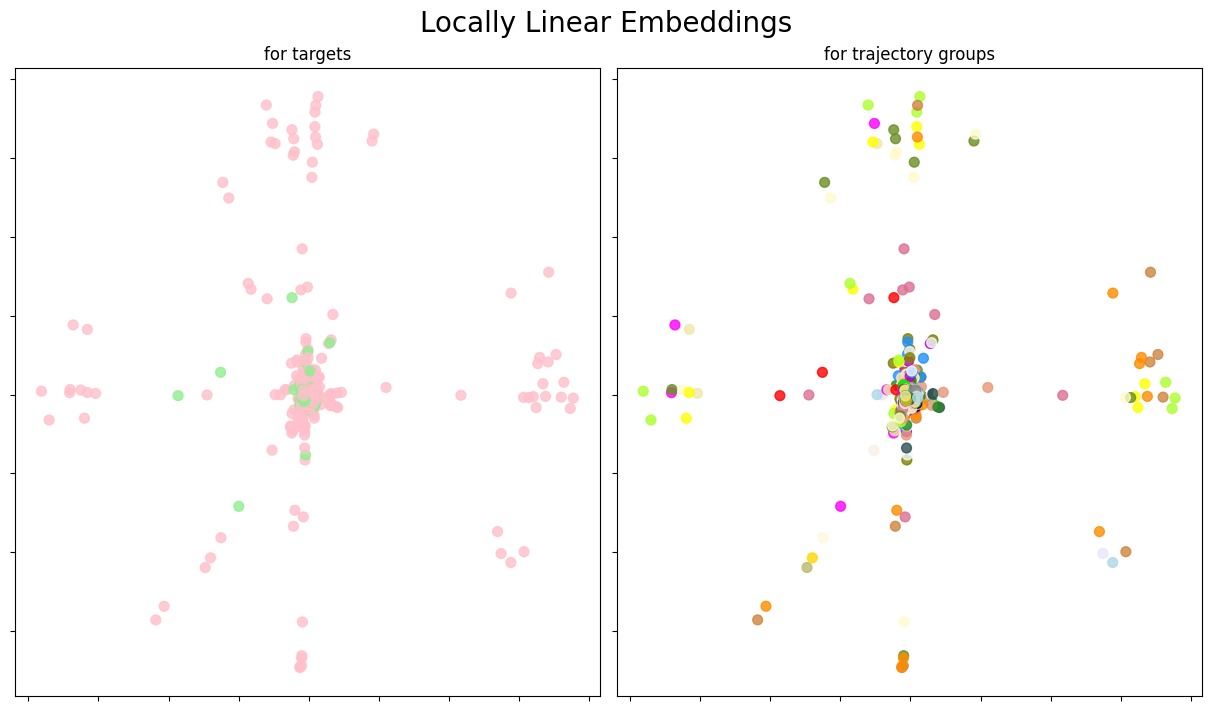

In [66]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 7), facecolor="white", constrained_layout=True
)

fig.suptitle('Locally Linear Embeddings', fontsize=20)

params = {
    "n_neighbors": 5,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

for i in range(15):
    lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
    S_mod = lle_mod.fit_transform(X_traj_ap[i])    
    add_2d_scatter(axs[0], S_mod, target_color, "for targets")
    add_2d_scatter(axs[1], S_mod, traj_color, "for trajectory groups")
plt.show()


### Isomap Embedding

Non-linear dimensionality reduction through Isometric Mapping.
Isomap seeks a lower-dimensional embedding which maintains geodesic
distances between all points. Read more in the `User Guide <isomap>`.



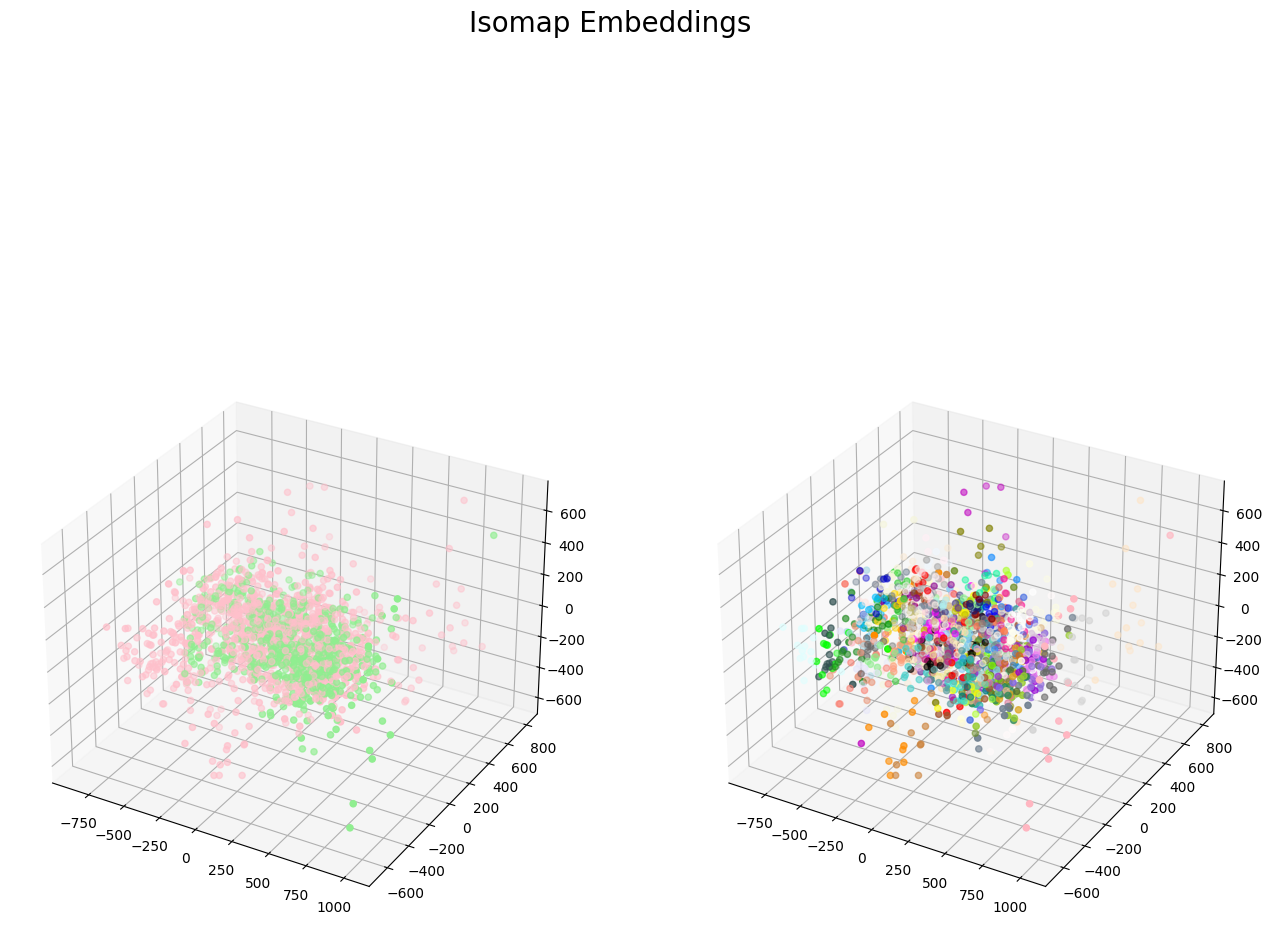

In [67]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)


fig.suptitle('Isomap Embeddings', fontsize=20)


for i in range(15):
    isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=3, p=1)
    S_isomap = isomap.fit_transform(X_traj_ap[i])
    axs[0].scatter3D(S_isomap[:, 0], S_isomap[:, 1], S_isomap[:, 2], color = target_color) 
    axs[1].scatter3D(S_isomap[:, 0], S_isomap[:, 1], S_isomap[:, 2], color = traj_color) 
plt.show()


### Multidimensional scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation
of the data in which the distances respect well the distances in the
original high-dimensional space.
Read more in the `User Guide <multidimensional_scaling>`.



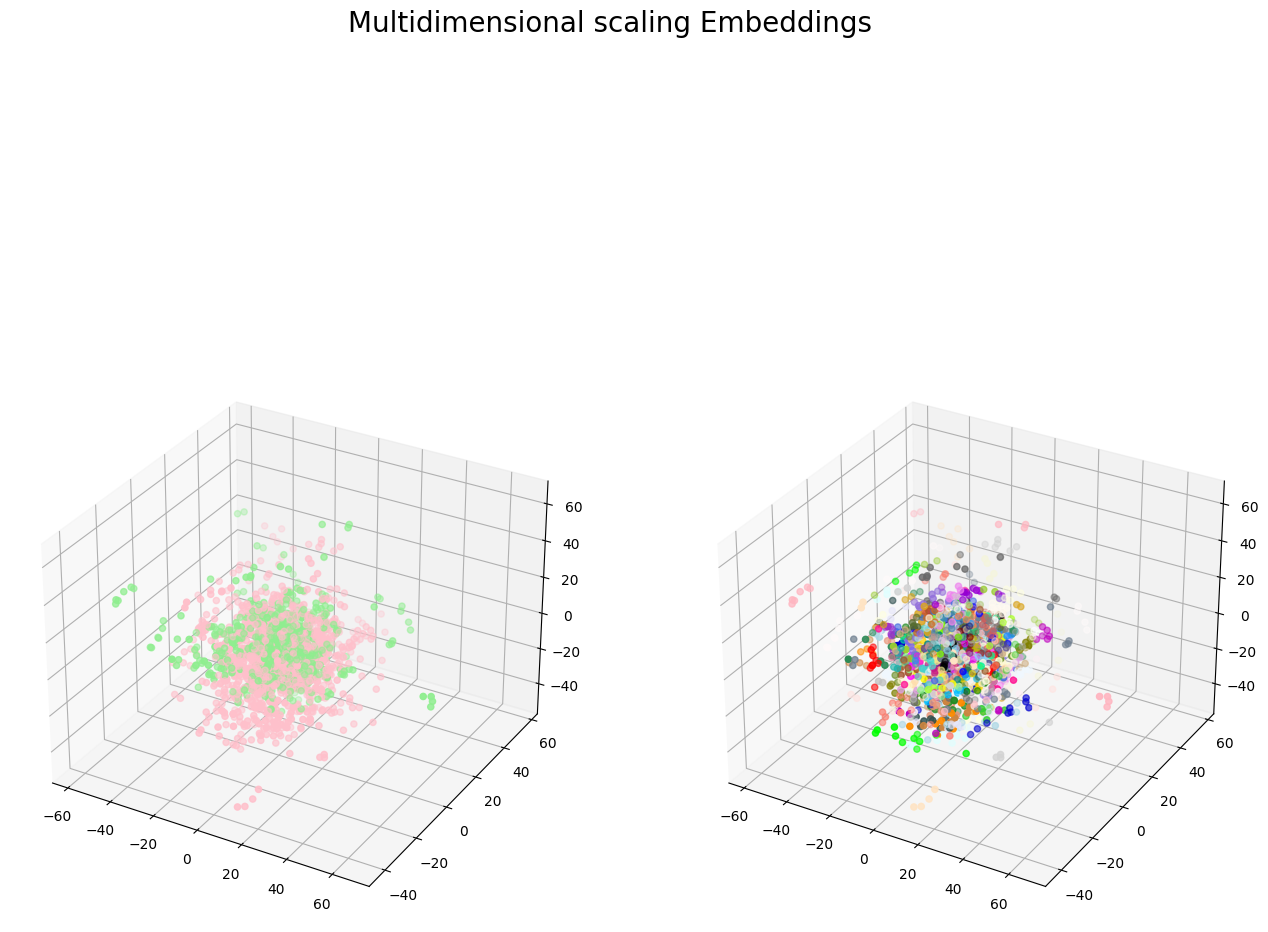

In [68]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)

fig.suptitle('Multidimensional scaling Embeddings', fontsize=20)


for i in range(15):
    md_scaling = manifold.MDS(
    n_components=3,
    max_iter=250,
    n_init=10,
    random_state=0,
    normalized_stress = False)
    S_scaling = md_scaling.fit_transform(X_traj_ap[i])
    axs[0].scatter3D(S_scaling[:, 0], S_scaling[:, 1], S_scaling[:, 2], color = target_color) 
    axs[1].scatter3D(S_scaling[:, 0], S_scaling[:, 1], S_scaling[:, 2], color = traj_color) 
plt.show()


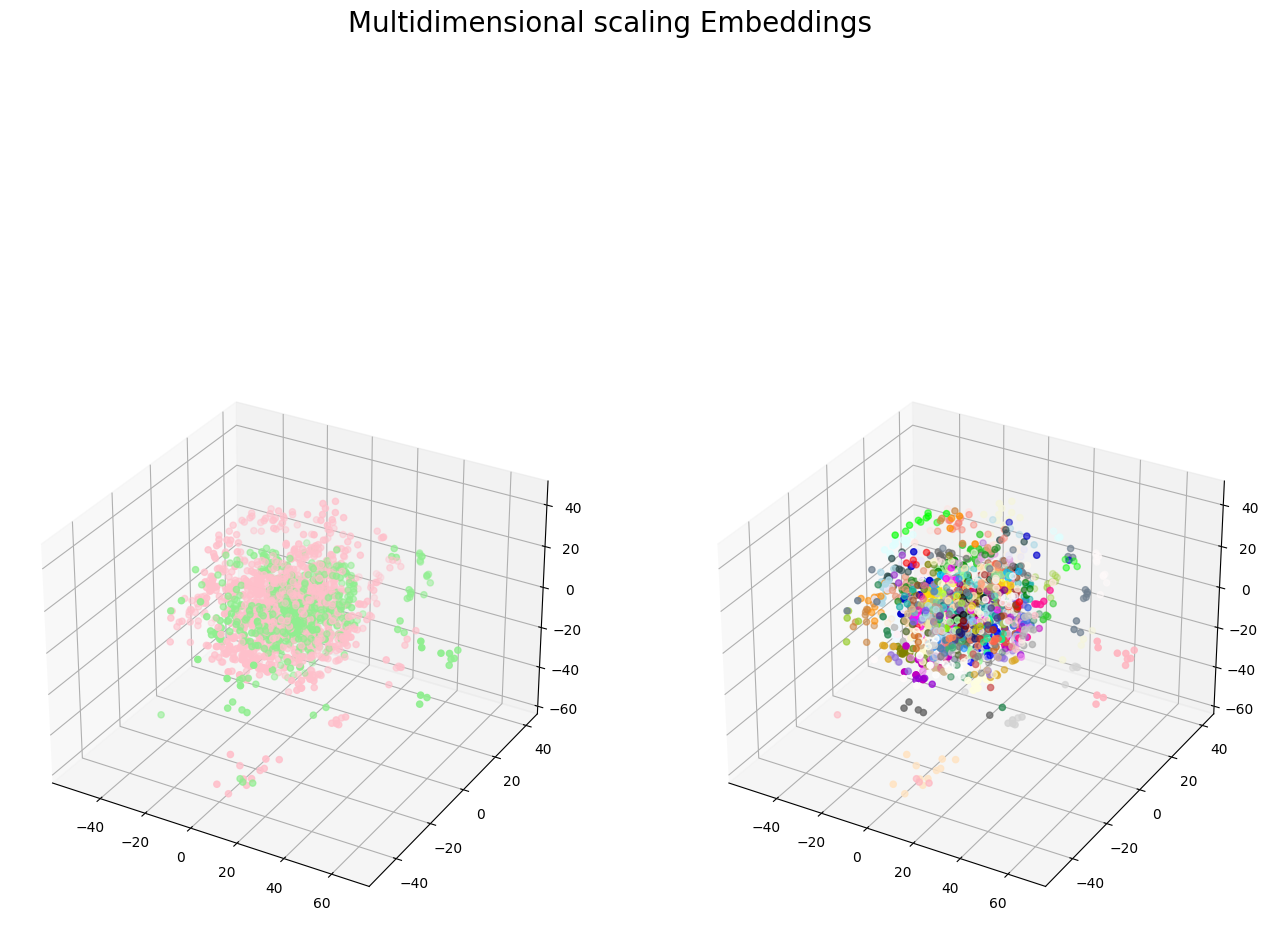

In [74]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)

fig.suptitle('Multidimensional scaling Embeddings', fontsize=20)


for i in range(15):
    md_scaling = manifold.MDS(
    n_components=3,
    max_iter=250,
    n_init=3,
    random_state=0,
    normalized_stress = False)
    S_scaling = md_scaling.fit_transform(X_traj_ap[i])
    axs[0].scatter3D(S_scaling[:, 0], S_scaling[:, 1], S_scaling[:, 2], color = target_color) 
    axs[1].scatter3D(S_scaling[:, 0], S_scaling[:, 1], S_scaling[:, 2], color = traj_color) 
plt.show()


### Spectral embedding for non-linear dimensionality reduction

This implementation uses Laplacian Eigenmaps, which finds a low dimensional
representation of the data using a spectral decomposition of the graph Laplacian.
Read more in the `User Guide <spectral_embedding>`.



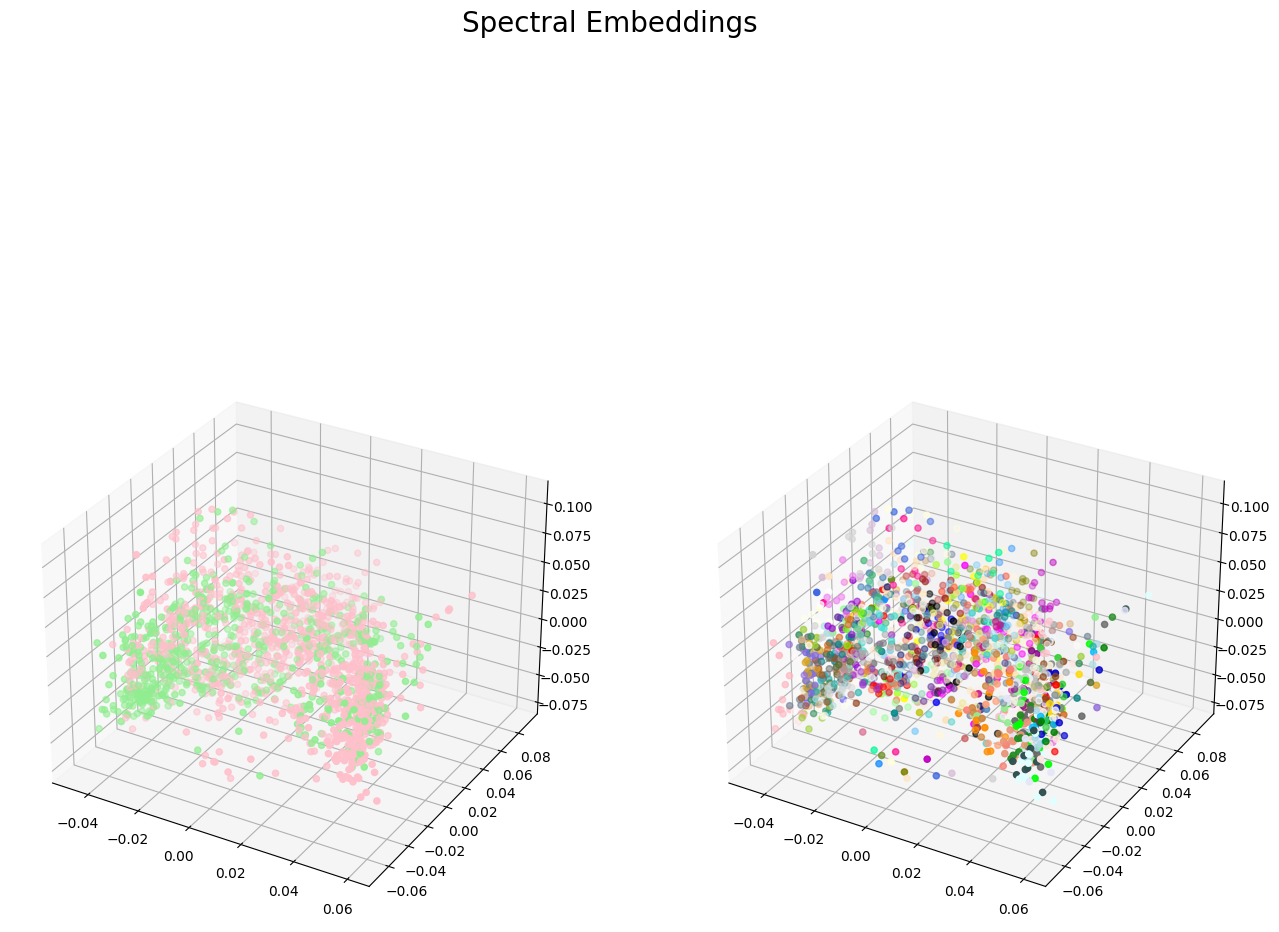

In [70]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)
fig.suptitle('Spectral Embeddings', fontsize=20)


for i in range(15):
    spectral = manifold.SpectralEmbedding(
    n_components=3, n_neighbors=n_neighbors, random_state=42
    )
    S_spectral = spectral.fit_transform(X_traj_ap[i])
    axs[0].scatter3D(S_spectral[:, 0], S_spectral[:, 1], S_spectral[:, 2], color = target_color) 
    axs[1].scatter3D(S_spectral[:, 0], S_spectral[:, 1], S_spectral[:, 2], color = traj_color) 
plt.show()


### T-distributed Stochastic Neighbor Embedding

It converts similarities between data points to joint probabilities and
tries to minimize the Kullback-Leibler divergence between the joint probabilities
of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost
function that is not convex, i.e. with different initializations we can get
different results. Read more in the `User Guide <t_sne>`.



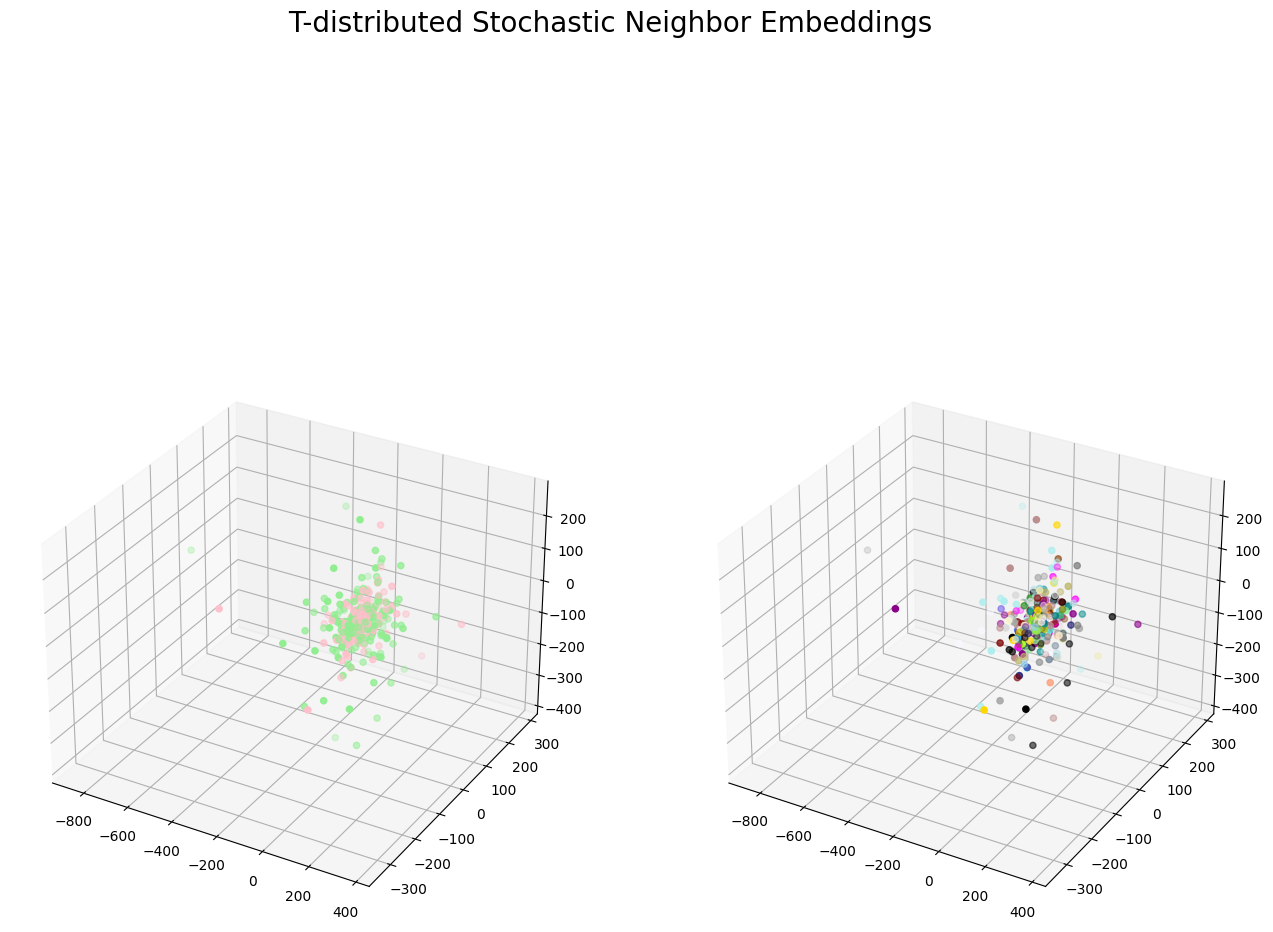

In [71]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)

fig.suptitle('T-distributed Stochastic Neighbor Embeddings', fontsize=20)


for i in range(15):
    t_sne = manifold.TSNE(
    n_components=3,
    perplexity=15,
    init="random",
    n_iter=250,
    random_state=0,
    )
    S_t_sne = t_sne.fit_transform(X_traj_ap[i])
    axs[0].scatter3D(S_t_sne[:, 0], S_t_sne[:, 1], S_t_sne[:, 2], color = target_color) 
    axs[1].scatter3D(S_t_sne[:, 0], S_t_sne[:, 1], S_t_sne[:, 2], color = traj_color) 
plt.show()


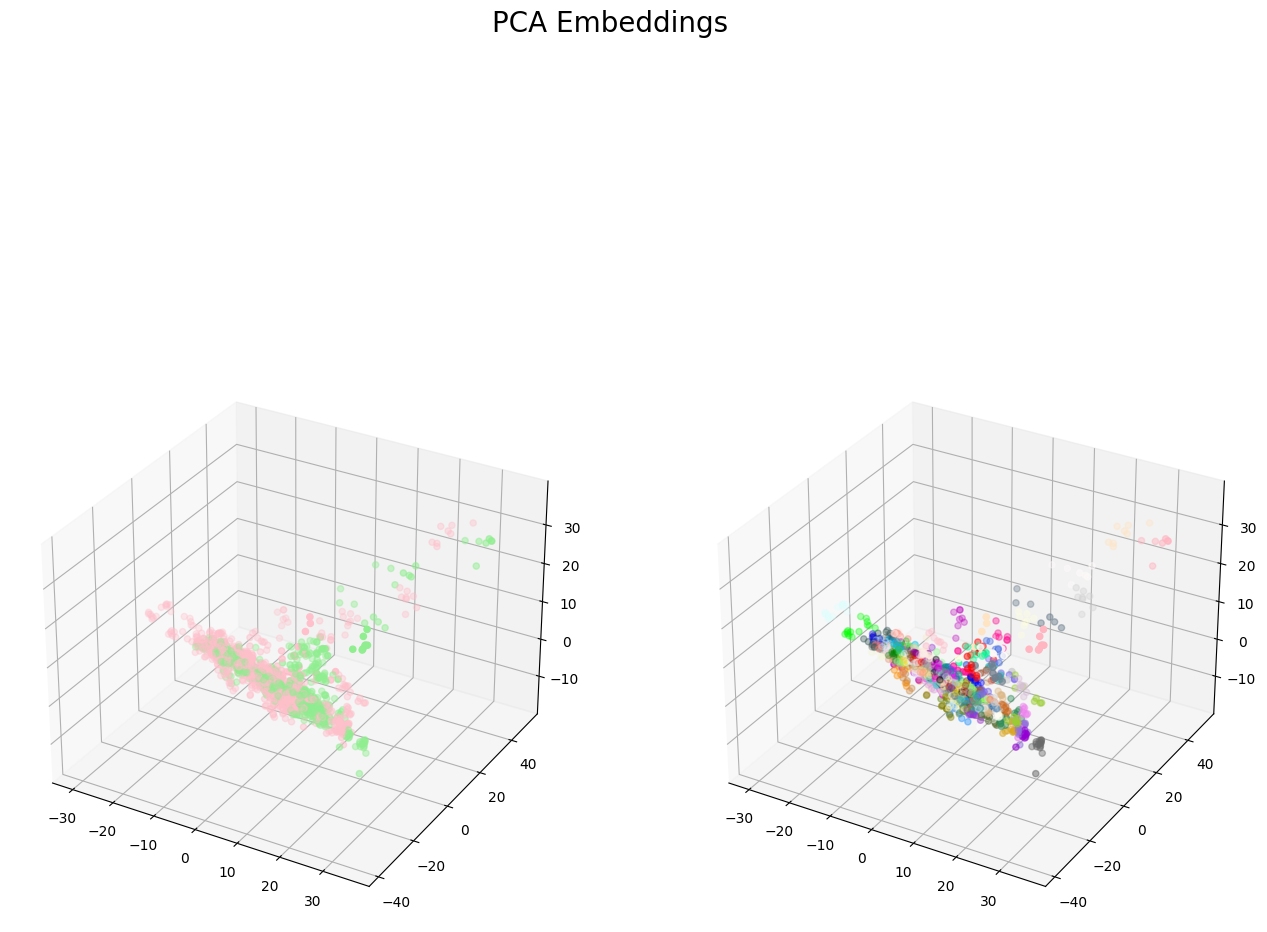

In [72]:
from sklearn.decomposition import PCA

fig, axs = plt.subplots(
    nrows=1, ncols=2, figsize=(16, 13), subplot_kw=dict(projection='3d')
)


fig.suptitle('PCA Embeddings', fontsize=20)


for i in range(15):
    t_sne = PCA(
    n_components=3
    )
    S_t_sne = t_sne.fit_transform(X_traj_ap[i])
    axs[0].scatter3D(S_t_sne[:, 0], S_t_sne[:, 1], S_t_sne[:, 2], color = target_color) 
    axs[1].scatter3D(S_t_sne[:, 0], S_t_sne[:, 1], S_t_sne[:, 2], color = traj_color) 
plt.show()
